#### Problem Statement

We have a dataset containing several characteristics of wheat crop. It also contains an output variable which
which specfies the type of wheat kernel based on those characteristics. The objective of this program is to build 
several classification algorithms and choose the best one among them based on evaluation results and also conduct 
a data exploration analysis.

#### The Dataset

This data was acquired from the 'UCI Center for Machine Learning' repository. It contains seven variables for three distinct types of wheat kernels: (Kama, Rosa, Canadian) designated as numerical variables 1, 2 & 3 respectively. The seven seed variables are:

Area
Perimeter
Compactness
Kernel Length
Kernel Width
Asymmetry Coefficient
Kernel Groove Length

The last column is reserved for the Kernel type. This particular dataset has 199 entries. Some of these variables are explicitly dependent. For example, compactness: C = 4piArea/(Perimeter)^2 has a linear proportional relationship with area, and also a square proportionality with kernel width. 

#### Importing Libraries

In [1]:
#Data Manipulation
import pandas as pd
import numpy as np

#Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')

#Model Building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

#### Reading Data

In [2]:
df = pd.read_csv('seeds.csv')
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
#Summary

df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


#### Data Cleaning

In [5]:
df["Type"].replace({1 :"Kama" , 2 :"Rosa" , 3 :"Canadian"} , inplace = True) ### changing numerical to categorical
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


In [6]:
df.isnull().sum() ###Checking for null values

'''We can see that there no null values present in the data so we don't need to clean any data'''

"We can see that there no null values present in the data so we don't need to clean any data"

#### Data Visualisation

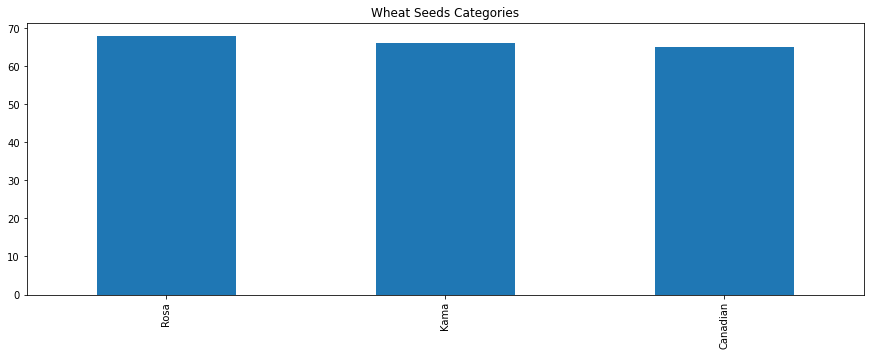

'We can observe that all the 3 different types of seeds are nearly identically distributed'

In [7]:
#Plotting the distribution of wheat seeds

df['Type'].value_counts().plot(kind='bar', title='Wheat Seeds Categories', figsize=(15,5))
plt.show()

'''We can observe that all the 3 different types of seeds are nearly identically distributed'''

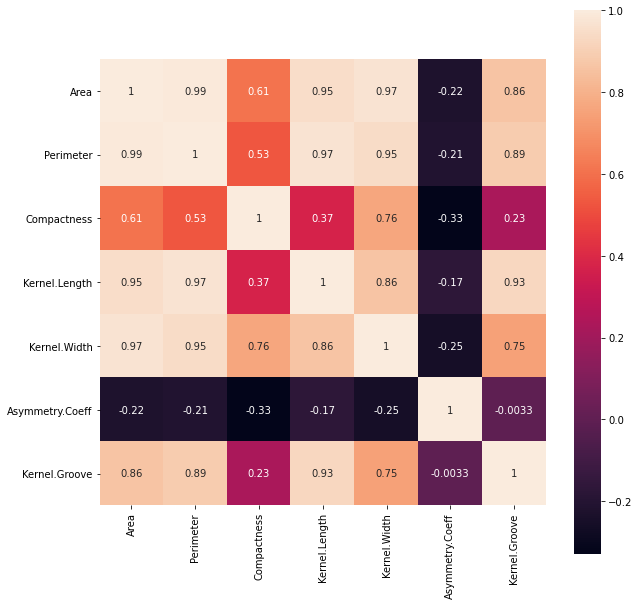

'All the variables except assymetry coeffient are postively correlated with each other. The lighter shades\nreflect that most of them are highly postively correlated'

In [8]:
### Correlation Heatmap

corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, annot=True, square=True ,ax=ax)
plt.yticks(rotation=360)
plt.show()

'''All the variables except assymetry coeffient are postively correlated with each other. The lighter shades
reflect that most of them are highly postively correlated'''

'We can notice there is a visible segregation between the three clusters although there is a some\noverlap between Kama and Canadian.Support Vector machine could be an optimal choice here for the best\nperforming classification algorithm since it based on segretation by decsion boundaries. We will see this later.'

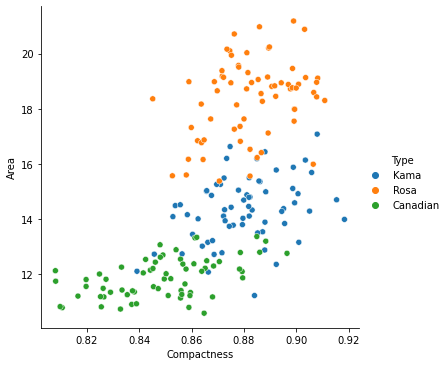

In [9]:
### Distribution of clusters of wheat kernels w.r.t. to area and compactness

sns.relplot(x='Compactness', y='Area', hue='Type', data=df);

'''We can notice there is a visible segregation between the three clusters although there is a some
overlap between Kama and Canadian.Support Vector machine could be an optimal choice here for the best
performing classification algorithm since it based on segretation by decsion boundaries. We will see this later.'''

#### Data Preparation

In [10]:
### Separating the input and output variables x and y

x = df.iloc[:,0:7]
x.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [11]:
y = df.iloc[:,7]
y.head()

0    Kama
1    Kama
2    Kama
3    Kama
4    Kama
Name: Type, dtype: object

In [12]:
scale= StandardScaler()
# standardization of dependent variables
scaled_data = scale.fit_transform(x)

In [13]:
#### Splitting dataset into training and testing sets with a test size of 25%

x_train , x_test , y_train , y_test = train_test_split(scaled_data, y, random_state=50, test_size = 0.25)

#### Model Building

##### Decision Tree

In [14]:
clf = DecisionTreeClassifier( min_samples_split=50 , criterion = 'entropy' ) #Create the Decision tree classifier from the sklearn library.

In [15]:
clf.fit(x_train , y_train) #Fit the Decision Tree with the training dataset.

DecisionTreeClassifier(criterion='entropy', min_samples_split=50)

In [16]:
y_pred = clf.predict(x_test) #Make Prediction using the test data

In [17]:
print("Accuracy of Decision Tree Prediction: " + str(accuracy_score(y_true = y_test , y_pred = y_pred)*100))

Accuracy of Decision Tree Prediction: 88.0


##### Support Vector Machine

In [18]:
# instantiate classifier
svc=SVC() 


# fit classifier to training set
svc.fit(x_train,y_train)


# make predictions on test set
y_pred=svc.predict(x_test)


# compute and print accuracy score
print('Accuracy of SVM: {0:0.2f}'. format(accuracy_score(y_test, y_pred)*100))

Accuracy of SVM: 90.00


##### Naive Bayes

In [19]:
# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

print('Model accuracy score: {0:0.2f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score: 86.00


In [20]:
'''Out of all the models we tested Support Vector Machine has the best accuracy score of 98%. So we will 
proceed ahead with SVM as our choice of classification algorithm. Let us dive a little deeper into 
our SVM model results and ways to improve the model using hyperparameter tuning.'''

'Out of all the models we tested Support Vector Machine has the best accuracy score of 98%. So we will \nproceed ahead with SVM as our choice of classification algorithm. Let us dive a little deeper into \nour SVM model results and ways to improve the model using hyperparameter tuning.'

In [21]:
# Create a Pickle file  
import pickle
pickle_out = open("classifier","wb")
pickle.dump(svc, pickle_out)
pickle_out.close()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred=svc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Canadian       1.00      0.80      0.89        20
        Kama       0.78      0.93      0.85        15
        Rosa       0.94      1.00      0.97        15

    accuracy                           0.90        50
   macro avg       0.91      0.91      0.90        50
weighted avg       0.91      0.90      0.90        50



Text(33.0, 0.5, 'Actual')

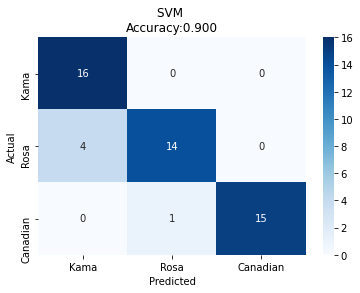

In [23]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_pred, y_test)
cm_df = pd.DataFrame(cf_matrix,
                     index = ['Kama','Rosa','Canadian'], 
                     columns = ['Kama','Rosa','Canadian'])

plt.title('SVM \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
sns.heatmap(cm_df,annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [24]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [25]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [26]:
grid_predictions = grid.predict(x_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

    Canadian       1.00      0.90      0.95        20
        Kama       0.88      1.00      0.94        15
        Rosa       1.00      1.00      1.00        15

    accuracy                           0.96        50
   macro avg       0.96      0.97      0.96        50
weighted avg       0.96      0.96      0.96        50



In [27]:
print('Model accuracy score: {0:0.2f}'. format(accuracy_score(y_test, grid_predictions)*100))

Model accuracy score: 96.00


In [28]:
'''As we can see from the above classification report and the accuracy score which was 90% during sprint 1
and now has been improved to 96% using hyperparameter tuning. We will now save this model use 
this for our deployment for web application '''

'As we can see from the above classification report and the accuracy score which was 90% during sprint 1\nand now has been improved to 96% using hyperparameter tuning. We will now save this model use \nthis for our deployment for web application '

#### Running SVM on best parameters

In [29]:
#instantiating fine-tuned classifier
svc=SVC(C=1000, gamma=0.01) 

# fit classifier to training set
svc.fit(x_train,y_train)


# make predictions on test set
y_pred=svc.predict(x_test)

In [30]:
score=accuracy_score(y_test,y_pred)
score

0.96

In [31]:
# Create a Pickle file  
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(svc, pickle_out)
pickle_out.close()

In [32]:
svc.predict([[14.88,14.57,0.8811,5.554,3.333,1.018,4.956]])

array(['Canadian'], dtype=object)